# FIFA Players Classification

This notebook contains the code to train models for the FIFA Classification problem based on their attributes

## Step 1: Import libraries

Libraries we will be using:
- **tensorflow** and **keras**: APIs for neural network model construction and training
- **numpy**: Numerical python library.
- **pandas**: Will be used to work with dataframes from .csv files.
- **sklearn**: Will be used to modify the labels of the data and do some statistical modifications.
- **matplotlib**: Will be used to plot graphics.
- **time**: To measure training time.
- **datetime**: To get the datetime a new model is created and use that to create its name

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from datetime import datetime

## Step 2: Load data

We first define the path to our data

In [2]:
DATA_FOLDER = "../Data"

ATT_FILE = f"{DATA_FOLDER}/FootballPlayerPreparedCleanAttributes.csv"
IMPUTED_ATT_FILE = f"{DATA_FOLDER}/ImputedFootballPlayerPreparedCleanAttributes.csv"

ONE_HOT_LABEL_FILE = f"{DATA_FOLDER}/FootballPlayerOneHotEncodedClasses.csv"
IMPUTED_ONE_HOT_LABEL_FILE = f"{DATA_FOLDER}/ImputedFootballPlayerPreparedCleanAttributes.csv"

Specify training options:
- **IMPUTED_DATA**: We will use file with data imputed
- **TRAIN_RATE**: The amount of instances to use during training, it will also determine the dev and test instances number indirectly

In [3]:
IMPUTED_DATA = False    # Use imputed dataset
TRAIN_RATE = 0.8        # The division of the data for training, validation and test

Because our data has more than 10000, we will be using 80-10-10 split in our dataset:
- **80%** for training
- **10%** for validation/dev test
- **10%** for final test

In [4]:
if IMPUTED_DATA:
    attributes = pd.read_csv(ATT_IMPUTED_FILE)
    labels = pd.read_csv(ONE_HOT_LABEL_IMPUTED_FILE)
else:
    attributes = pd.read_csv(ATT_FILE)
    labels = pd.read_csv(ONE_HOT_LABEL_FILE)

n_total_instances = attributes.shape[0]
n_train_instances = int(n_total_instances * TRAIN_RATE)
n_dev_instances = int((n_total_instances - n_train_instances)/2)

instances_train = attributes.values[:n_train_instances]
labels_train = labels.values[:n_train_instances]

instances_dev = attributes.values[n_train_instances: n_train_instances + n_dev_instances]
labels_dev = labels.values[n_train_instances: n_train_instances + n_dev_instances]

print("instances_train:", instances_train.shape)
print("labels_train:", labels_train.shape)
print("instances_dev:", instances_dev.shape)
print("labels_dev:",labels_dev.shape)

instances_train: (12897, 17)
labels_train: (12897, 4)
instances_dev: (1612, 17)
labels_dev: (1612, 4)


## Step 3: Initialize variables
- **INPUT_SIZE**: The size of the training instances
- **OUTPUT_SIZE**: The number of possible classes
- **NUM_TRAINING_EXAMPLES**: The number of possible classes
- **NUM_DEV_EXAMPLES**: The number of validation/dev test instances

In [5]:
INPUT_SIZE = instances_train.shape[1]
OUTPUT_SIZE = labels_train.shape[1]
NUM_TRAINING_EXAMPLES = int(round(instances_train.shape[0]/1))
NUM_DEV_EXAMPLES = int(round(instances_dev.shape[0]/1))

## Step 4: Set hyperparameters

- **LEARNING_RATE** $\alpha$: The step size in the learning process
- **BATCH_SIZE**: The size of each batch
- **N_HIDDEN**: Number of neurons in the hidden.

The learning process stops when it reaches 20,000 learning iterations. An iteration comprises presenting the network *batch_size* learning examples and then adjusting the weights (parameters).

In [6]:
N_EPOCHS = 400
LEARNING_RATE = 0.1
BATCH_SIZE = 128
ACTIVATION = "tanh"
N_HIDDEN = [128, 64, 32]
REGULARIZER = keras.regularizers.l2(0.001)
LOSS = tf.keras.losses.categorical_crossentropy
OPTIMIZER = tf.keras.optimizers.SGD(learning_rate=LEARNING_RATE)
METRICS = ["categorical_accuracy"]

## Step 5: Build the model

In [7]:
def architecture1():
    model = keras.Sequential(name="Model")
    model.add(keras.layers.InputLayer(input_shape=(INPUT_SIZE,), batch_size=None))
    for neurons in N_HIDDEN:
        model.add(keras.layers.Dense(neurons, activation=ACTIVATION))
    model.add(keras.layers.Dense(OUTPUT_SIZE, activation="softmax"))
    
    model_name = "D512"
    return model, model_name


def architecture2():
    model = keras.Sequential(name="Model")
    model.add(keras.layers.InputLayer(input_shape=(INPUT_SIZE,),
                                      batch_size=None))
    for neurons in N_HIDDEN:
        model.add(keras.layers.Dense(neurons,
                                     activation=ACTIVATION,
                                     kernel_regularizer=REGULARIZER
                                    ))
        
    model.add(keras.layers.Dense(OUTPUT_SIZE, 
                                 activation="softmax"))
    
    model_name = "D128_D64_D32"
    return model, model_name


def compile_model(model):
    my_model.compile(loss=LOSS,
                     optimizer=OPTIMIZER,
                     metrics=METRICS)

In [8]:
my_model, model_name = architecture2()

In [9]:
compile_model(my_model)

## Step 6: Train the model

In [10]:
start_time = time.perf_counter()
history = my_model.fit(instances_train,
                       labels_train,
                       batch_size=BATCH_SIZE,
                       epochs=N_EPOCHS,
                       verbose=1,
                       validation_data=(instances_dev, labels_dev))
end_time = time.perf_counter()

Epoch 1/400
101/101 [==============================] - 2s 6ms/step - loss: 1.0304 - categorical_accuracy: 0.6100 - val_loss: 0.8883 - val_categorical_accuracy: 0.6569
Epoch 2/400
101/101 [==============================] - 0s 4ms/step - loss: 0.8425 - categorical_accuracy: 0.6924 - val_loss: 0.8539 - val_categorical_accuracy: 0.6855
Epoch 3/400
101/101 [==============================] - 0s 4ms/step - loss: 0.8183 - categorical_accuracy: 0.6984 - val_loss: 0.8384 - val_categorical_accuracy: 0.6942
Epoch 4/400
101/101 [==============================] - 0s 4ms/step - loss: 0.7997 - categorical_accuracy: 0.7074 - val_loss: 0.8289 - val_categorical_accuracy: 0.6935
Epoch 5/400
101/101 [==============================] - 0s 4ms/step - loss: 0.7721 - categorical_accuracy: 0.7198 - val_loss: 0.7754 - val_categorical_accuracy: 0.7078
Epoch 6/400
101/101 [==============================] - 0s 4ms/step - loss: 0.7369 - categorical_accuracy: 0.7370 - val_loss: 0.7314 - val_categorical_accuracy: 0.733

Epoch 50/400
101/101 [==============================] - 1s 6ms/step - loss: 0.5075 - categorical_accuracy: 0.8003 - val_loss: 0.5293 - val_categorical_accuracy: 0.7804
Epoch 51/400
101/101 [==============================] - 1s 6ms/step - loss: 0.5112 - categorical_accuracy: 0.8004 - val_loss: 0.5429 - val_categorical_accuracy: 0.7649
Epoch 52/400
101/101 [==============================] - 1s 6ms/step - loss: 0.5078 - categorical_accuracy: 0.7994 - val_loss: 0.5354 - val_categorical_accuracy: 0.7792
Epoch 53/400
101/101 [==============================] - 1s 6ms/step - loss: 0.5049 - categorical_accuracy: 0.8022 - val_loss: 0.5178 - val_categorical_accuracy: 0.7916
Epoch 54/400
101/101 [==============================] - 1s 6ms/step - loss: 0.5035 - categorical_accuracy: 0.8048 - val_loss: 0.5257 - val_categorical_accuracy: 0.7909
Epoch 55/400
101/101 [==============================] - 1s 6ms/step - loss: 0.5052 - categorical_accuracy: 0.8037 - val_loss: 0.5118 - val_categorical_accuracy:

Epoch 99/400
101/101 [==============================] - 1s 6ms/step - loss: 0.4847 - categorical_accuracy: 0.8029 - val_loss: 0.5716 - val_categorical_accuracy: 0.7512
Epoch 100/400
101/101 [==============================] - 1s 6ms/step - loss: 0.4890 - categorical_accuracy: 0.8030 - val_loss: 0.5303 - val_categorical_accuracy: 0.7705
Epoch 101/400
101/101 [==============================] - 1s 6ms/step - loss: 0.4841 - categorical_accuracy: 0.8074 - val_loss: 0.4982 - val_categorical_accuracy: 0.7947
Epoch 102/400
101/101 [==============================] - 1s 6ms/step - loss: 0.4866 - categorical_accuracy: 0.8057 - val_loss: 0.4934 - val_categorical_accuracy: 0.7971
Epoch 103/400
101/101 [==============================] - 1s 6ms/step - loss: 0.4918 - categorical_accuracy: 0.8010 - val_loss: 0.5067 - val_categorical_accuracy: 0.7959
Epoch 104/400
101/101 [==============================] - 1s 6ms/step - loss: 0.4802 - categorical_accuracy: 0.8076 - val_loss: 0.4945 - val_categorical_accu

101/101 [==============================] - 1s 6ms/step - loss: 0.4746 - categorical_accuracy: 0.8107 - val_loss: 0.4907 - val_categorical_accuracy: 0.7947
Epoch 148/400
101/101 [==============================] - 1s 6ms/step - loss: 0.4786 - categorical_accuracy: 0.8080 - val_loss: 0.4986 - val_categorical_accuracy: 0.7823
Epoch 149/400
101/101 [==============================] - 1s 6ms/step - loss: 0.4733 - categorical_accuracy: 0.8117 - val_loss: 0.5405 - val_categorical_accuracy: 0.7754
Epoch 150/400
101/101 [==============================] - 1s 6ms/step - loss: 0.4735 - categorical_accuracy: 0.8118 - val_loss: 0.4817 - val_categorical_accuracy: 0.7959
Epoch 151/400
101/101 [==============================] - 1s 6ms/step - loss: 0.4732 - categorical_accuracy: 0.8131 - val_loss: 0.5173 - val_categorical_accuracy: 0.7897
Epoch 152/400
101/101 [==============================] - 1s 6ms/step - loss: 0.4737 - categorical_accuracy: 0.8120 - val_loss: 0.5027 - val_categorical_accuracy: 0.7860


101/101 [==============================] - 1s 6ms/step - loss: 0.4767 - categorical_accuracy: 0.8088 - val_loss: 0.4950 - val_categorical_accuracy: 0.7940
Epoch 196/400
101/101 [==============================] - 1s 6ms/step - loss: 0.4711 - categorical_accuracy: 0.8137 - val_loss: 0.5069 - val_categorical_accuracy: 0.7978
Epoch 197/400
101/101 [==============================] - 1s 6ms/step - loss: 0.4703 - categorical_accuracy: 0.8103 - val_loss: 0.4845 - val_categorical_accuracy: 0.8127
Epoch 198/400
101/101 [==============================] - 1s 6ms/step - loss: 0.4686 - categorical_accuracy: 0.8152 - val_loss: 0.4900 - val_categorical_accuracy: 0.7903
Epoch 199/400
101/101 [==============================] - 1s 6ms/step - loss: 0.4709 - categorical_accuracy: 0.8139 - val_loss: 0.4786 - val_categorical_accuracy: 0.8102
Epoch 200/400
101/101 [==============================] - 1s 6ms/step - loss: 0.4695 - categorical_accuracy: 0.8142 - val_loss: 0.5432 - val_categorical_accuracy: 0.7605


101/101 [==============================] - 1s 6ms/step - loss: 0.4761 - categorical_accuracy: 0.8103 - val_loss: 0.4971 - val_categorical_accuracy: 0.8040
Epoch 244/400
101/101 [==============================] - 1s 6ms/step - loss: 0.4717 - categorical_accuracy: 0.8110 - val_loss: 0.4844 - val_categorical_accuracy: 0.8120
Epoch 245/400
101/101 [==============================] - 1s 6ms/step - loss: 0.4727 - categorical_accuracy: 0.8117 - val_loss: 0.4889 - val_categorical_accuracy: 0.7965
Epoch 246/400
101/101 [==============================] - 1s 6ms/step - loss: 0.4675 - categorical_accuracy: 0.8159 - val_loss: 0.4785 - val_categorical_accuracy: 0.7959
Epoch 247/400
101/101 [==============================] - 1s 6ms/step - loss: 0.4690 - categorical_accuracy: 0.8115 - val_loss: 0.4968 - val_categorical_accuracy: 0.7816
Epoch 248/400
101/101 [==============================] - 1s 6ms/step - loss: 0.4687 - categorical_accuracy: 0.8145 - val_loss: 0.4920 - val_categorical_accuracy: 0.8021


101/101 [==============================] - 1s 6ms/step - loss: 0.4689 - categorical_accuracy: 0.8122 - val_loss: 0.4876 - val_categorical_accuracy: 0.8033
Epoch 292/400
101/101 [==============================] - 1s 6ms/step - loss: 0.4735 - categorical_accuracy: 0.8103 - val_loss: 0.5087 - val_categorical_accuracy: 0.7792
Epoch 293/400
101/101 [==============================] - 1s 6ms/step - loss: 0.4765 - categorical_accuracy: 0.8114 - val_loss: 0.5104 - val_categorical_accuracy: 0.7835
Epoch 294/400
101/101 [==============================] - 1s 6ms/step - loss: 0.4741 - categorical_accuracy: 0.8144 - val_loss: 0.4872 - val_categorical_accuracy: 0.8114
Epoch 295/400
101/101 [==============================] - 1s 6ms/step - loss: 0.4694 - categorical_accuracy: 0.8111 - val_loss: 0.4765 - val_categorical_accuracy: 0.8046
Epoch 296/400
101/101 [==============================] - 1s 6ms/step - loss: 0.4696 - categorical_accuracy: 0.8127 - val_loss: 0.5134 - val_categorical_accuracy: 0.7804


101/101 [==============================] - 1s 6ms/step - loss: 0.4740 - categorical_accuracy: 0.8103 - val_loss: 0.4907 - val_categorical_accuracy: 0.8015
Epoch 340/400
101/101 [==============================] - 1s 6ms/step - loss: 0.4698 - categorical_accuracy: 0.8147 - val_loss: 0.5046 - val_categorical_accuracy: 0.7928
Epoch 341/400
101/101 [==============================] - 1s 6ms/step - loss: 0.4713 - categorical_accuracy: 0.8099 - val_loss: 0.5017 - val_categorical_accuracy: 0.7959
Epoch 342/400
101/101 [==============================] - 1s 6ms/step - loss: 0.4720 - categorical_accuracy: 0.8141 - val_loss: 0.5001 - val_categorical_accuracy: 0.7891
Epoch 343/400
101/101 [==============================] - 1s 6ms/step - loss: 0.4696 - categorical_accuracy: 0.8131 - val_loss: 0.5882 - val_categorical_accuracy: 0.7568
Epoch 344/400
101/101 [==============================] - 1s 6ms/step - loss: 0.4700 - categorical_accuracy: 0.8122 - val_loss: 0.4784 - val_categorical_accuracy: 0.8033


101/101 [==============================] - 1s 6ms/step - loss: 0.4684 - categorical_accuracy: 0.8133 - val_loss: 0.4953 - val_categorical_accuracy: 0.8040
Epoch 388/400
101/101 [==============================] - 1s 6ms/step - loss: 0.4714 - categorical_accuracy: 0.8113 - val_loss: 0.4741 - val_categorical_accuracy: 0.8083
Epoch 389/400
101/101 [==============================] - 1s 6ms/step - loss: 0.4713 - categorical_accuracy: 0.8119 - val_loss: 0.5057 - val_categorical_accuracy: 0.7928
Epoch 390/400
101/101 [==============================] - 1s 6ms/step - loss: 0.4717 - categorical_accuracy: 0.8108 - val_loss: 0.4874 - val_categorical_accuracy: 0.8002
Epoch 391/400
101/101 [==============================] - 1s 6ms/step - loss: 0.4707 - categorical_accuracy: 0.8123 - val_loss: 0.4786 - val_categorical_accuracy: 0.8077
Epoch 392/400
101/101 [==============================] - 1s 6ms/step - loss: 0.4684 - categorical_accuracy: 0.8121 - val_loss: 0.4774 - val_categorical_accuracy: 0.8089


## Step 7: Analyze results

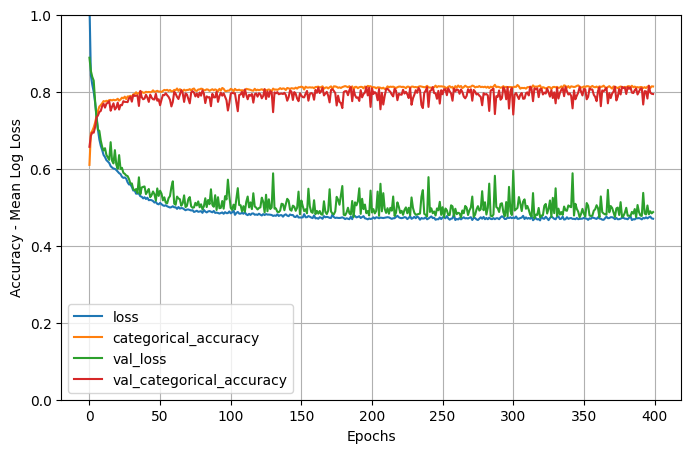

In [11]:
results=pd.DataFrame(history.history)
results.plot(figsize=(8, 5))
plt.grid(True)
plt.xlabel ("Epochs")
plt.ylabel ("Accuracy - Mean Log Loss")
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [12]:
training_accuracy = round(results.categorical_accuracy.values[-1:][0]*100, 2)
val_accuracy = round(results.val_categorical_accuracy.values[-1:][0]*100, 2)
training_error = round((1 - results.categorical_accuracy.values[-1:][0])*100, 2)
test_error = round((1 - results.val_categorical_accuracy.values[-1:][0])*100, 2)
human_error = 5
bias = round(training_error - human_error, 2)
variance = round(test_error - training_error, 2)
training_time = round(end_time - start_time)
print("Error (training):", training_error, "%")
print("Error (test):", test_error, "%")
print("Bias:", bias)
print("Variance:", variance)
print("Time: ", training_time, "seconds")

Error (training): 18.64 %
Error (test): 20.6 %
Bias: 13.64
Variance: 1.96
Time:  250 seconds


## Step 8: Save results

In [13]:
RESULTS_FOLDER = "../Results"
RESULTS_FILE = f"{RESULTS_FOLDER}/models_performance.csv"

In [14]:
results_df = pd.read_csv(RESULTS_FILE, index_col = 0)

In [15]:
COLUMNS = [
    'model_name',
    'epochs',
    'learning_rate',
    'batch_size',
    'activation',
    'loss',
    'optimizer',
    'regularization',
    'train_accuracy',
    'validation_accuracy',
    'bias',
    'variance',
    'training_time'
]

new_result = [[
    model_name,
    N_EPOCHS,
    LEARNING_RATE,
    BATCH_SIZE,
    ACTIVATION,
    "categorical_crossentropy",
    "SGD",
    "l2 0.001",
    training_accuracy,
    val_accuracy,
    bias,
    variance,
    training_time]]

new_result_df = pd.DataFrame(new_result, columns=COLUMNS)
concatenation = pd.concat([results_df, new_result_df], ignore_index=True)
concatenation.to_csv(RESULTS_FILE)


In [16]:
last_five = concatenation.tail(5)
print(last_five)
print("\n---Metrics---")
print(last_five[["train_accuracy", "validation_accuracy", "bias", "variance", "training_time"]].describe())

      model_name  epochs  learning_rate  batch_size activation  \
30  D128_D64_D32     400            0.1         128       tanh   
31  D128_D64_D32     400            0.1         128       tanh   
32  D128_D64_D32     400            0.1         128       tanh   
33  D128_D64_D32     400            0.1         128       tanh   
34  D128_D64_D32     400            0.1         128       tanh   

                        loss optimizer regularization  train_accuracy  \
30  categorical_crossentropy       SGD       l2 0.001           81.37   
31  categorical_crossentropy       SGD       l2 0.001           80.96   
32  categorical_crossentropy       SGD       l2 0.001           81.00   
33  categorical_crossentropy       SGD       l2 0.001           81.29   
34  categorical_crossentropy       SGD       l2 0.001           81.36   

    validation_accuracy   bias  variance  training_time  
30                79.96  13.63      1.41            249  
31                78.60  14.04      2.36        

In [17]:
MODELS_FOLDER = "../Models"
save_name = f"{MODELS_FOLDER}/{model_name}-2.h5"
my_model.save(save_name)